In [ ]:
pip install streamlit


     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 164 kB 47.3 MB/s 
     |████████████████████████████████| 181 kB 48.3 MB/s 
     |████████████████████████████████| 111 kB 48.1 MB/s 
     |████████████████████████████████| 4.3 MB 43.5 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 130 kB 48.1 MB/s 
     |████████████████████████████████| 793 kB 55.5 MB/s 
     |████████████████████████████████| 380 kB 51.2 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=e8926009185633343989eb3508546e0e45d55d0ee589db4fa3806cac19c8a156
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      

In [ ]:
pip install networkx

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.10.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.32.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# importing libraries and site packages
import streamlit as st
from datetime import date
import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go


2022-03-31 10:05:34.344 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


In [ ]:
# Defining a start date so that we can get a range of data from that date till today
START = "2000-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Providing a title to the project
st.title('Predict over data')

# yfinance has its abbreviations defined for the stocks, we are here picking few and using them
stocks = ('RELIANCE.NS', 'INFY', 'HDFCBANK', 'ICICIBANK')
# creating a select box using streamlit feature
selected_stock = st.selectbox('Select dataset for prediction', stocks)

# Setting a slider for the years of prediction and getting the details of prices of stock of each day
n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365


2022-03-31 10:05:35.505 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

# Loading data from yfinance for selected stocks using load_data()
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')


st.subheader('Raw data')
st.write(data.tail())

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Plotting the raw data
def plot_raw_data():
	fig = go.Figure()
# Open is the first price that someone has paid for for share of the particular stock.
# Close is the last price that someone has paid for a share of the particular stock.
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
	fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
	st.plotly_chart(fig)
	
plot_raw_data()

In [ ]:
# Predicting forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)


2022-03-31 10:05:37.764 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


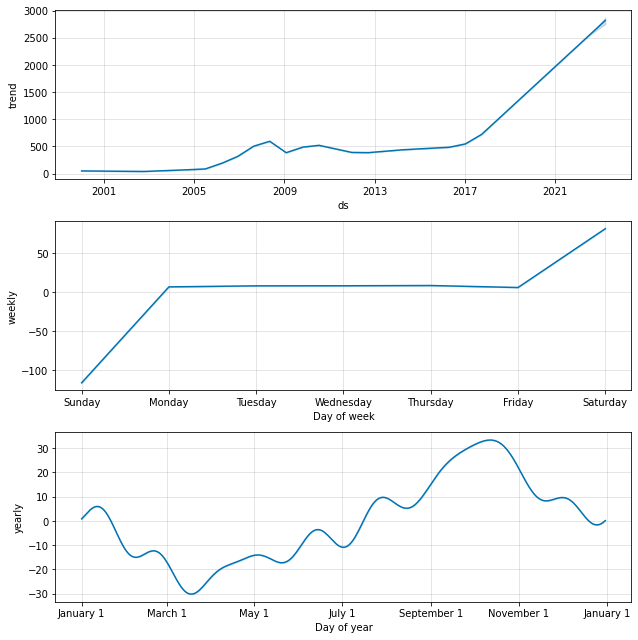

In [ ]:

# Showing and plotting the forecast with the help of plotly
st.subheader('Forecast data')
st.write(forecast.tail())
    
st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

# Forecast components
st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)


